##                                       COMP4605 DATA MINING
### -TRAFFIC IN THE ISTANBUL

Traffic is one of the biggest problem in Istanbul. So much so that Istanbul is the 5th most populated city in the world according to report of TOMTOM[1]. In 2019, people of Istanbul lost their 225 hours in traffic so they spent 9 days and 9 hours in traffic [2]. 

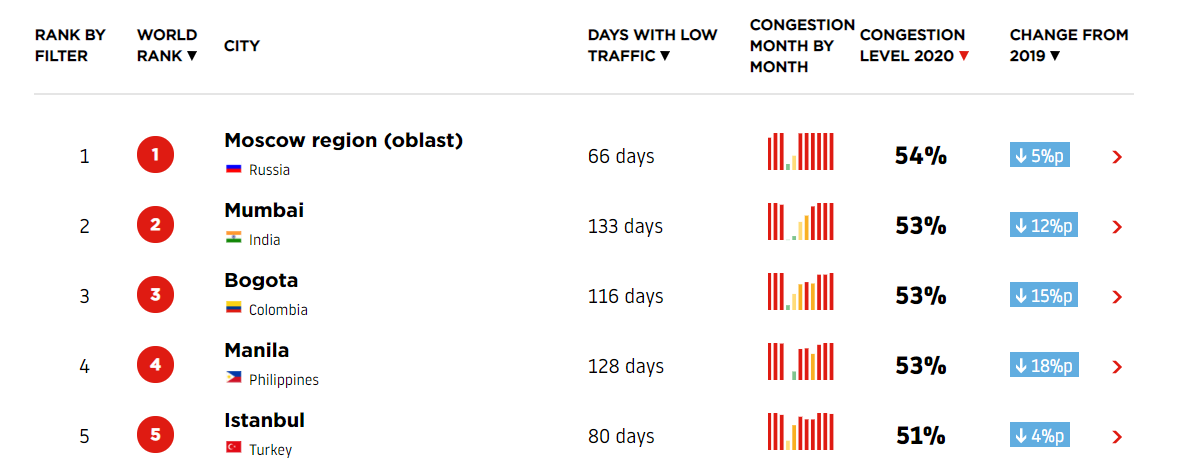

In this project, we will analyze the traffic in the Istanbul. For this purpose, we use traffic index [3], traffic density [4], and traffic announcements[5] datasets provided by Istanbul Metropolitan Municipality (İBB).

Using these datasets, we try to analyze:
- Effect of traffic density on speed,
- How the seasons effect the traffic density and traffic announcements,
- Whether the covid19 has an effect on traffic index,
- Daily, weekly and monthly average of traffic density,
- Weekday traffic and weekend traffic,

in Istanbul.

# 

[1]https://www.tomtom.com/en_gb/traffic-index/ranking/

[2]https://tr.euronews.com/2020/01/31/istanbul-trafik-yogunlugunda-dunyada-9-uncu-avrupa-2-nci

[3]https://data.ibb.gov.tr/dataset/istanbul-trafik-indeksi/resource/ba47eacb-a4e1-441c-ae51-0e622d4a18e2

[4]https://data.ibb.gov.tr/dataset/saatlik-trafik-yogunluk-veri-seti/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821

[5]https://data.ibb.gov.tr/en/dataset/ulasim-yonetim-merkezi-trafik-duyuru-verisi/resource/1c043914-8a76-4793-bae9-c60a68c7d389?inner_span%3DTrue

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from scipy import stats

In [2]:
#traffic density dataset
traffic_density = pd.read_csv(r'DataSet/traffic_density.csv')

#traffic announcement dataset
traffic_announcement = pd.read_csv(r'DataSet/traffic_announcement/traffic_announcement.csv')

#traffic index datast
traffic_index = pd.read_csv(r'DataSet/traffic_index.csv')

    
print('Traffic Density Shape: ',traffic_density.shape)    
print('Traffic Announcement Shape: ',traffic_announcement.shape)    
print('Traffic Index Shape: ',traffic_index.shape)    

Traffic Density Shape:  (18832215, 9)
Traffic Announcement Shape:  (130633, 12)
Traffic Index Shape:  (824, 4)


In [3]:
#Traffic Density Dataset
traffic_density

,Unnamed: 0,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,0,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,1,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,2,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,3,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,4,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
...,...,...,...,...,...,...,...,...,...
18832210,1187388,2021-03-16 04:00:00,28.690796,40.992737,sxk3hy,13,59,35,11
18832211,1187389,2021-03-13 13:00:00,29.064331,40.992737,sxk9jq,2,97,31,265
18832212,1187390,2021-03-22 03:00:00,28.921509,41.097107,sxk9f1,49,139,88,49
18832213,1187391,2021-03-06 18:00:00,29.207153,40.926819,sxkbbd,11,118,65,152


In [4]:
traffic_density.corr()

,Unnamed: 0,LONGITUDE,LATITUDE,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
Unnamed: 0,1.000000,-0.000022,0.000267,-0.000424,-0.001180,-0.001167,0.004981
LONGITUDE,-0.000022,1.000000,-0.510530,-0.246195,-0.142461,-0.212720,0.153697
LATITUDE,0.000267,-0.510530,1.000000,0.344269,0.156907,0.255185,-0.184523
MINIMUM_SPEED,-0.000424,-0.246195,0.344269,1.000000,0.536889,0.778270,-0.243864
MAXIMUM_SPEED,-0.001180,-0.142461,0.156907,0.536889,1.000000,0.850194,0.210425
AVERAGE_SPEED,-0.001167,-0.212720,0.255185,0.778270,0.850194,1.000000,-0.041518
NUMBER_OF_VEHICLES,0.004981,0.153697,-0.184523,-0.243864,0.210425,-0.041518,1.000000


According to correlation of traffic density dataset, minimum speed and maximum speed positively high correlated with average speed.

### - Is the maximum traffic speed high when the number of vehicles high?

In [5]:
density_in_place = traffic_density[traffic_density['GEOHASH'] == 'sxk906']

data = np.array([density_in_place['MAXIMUM_SPEED'], density_in_place['NUMBER_OF_VEHICLES']]).T
data = pd.DataFrame(data, columns=['Max_Speed', '#OfVehicles']).dropna()
data = data.groupby('#OfVehicles').max().reset_index()
data

,#OfVehicles,Max_Speed
0,11,137
1,12,125
2,13,127
3,14,140
4,15,143
...,...,...
203,221,85
204,225,96
205,227,89
206,231,83


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #OfVehicles  208 non-null    int64
 1   Max_Speed    208 non-null    int64
dtypes: int64(2)
memory usage: 3.4 KB


In [7]:
data.describe()

,#OfVehicles,Max_Speed
count,208.000000,208.000000
mean,114.903846,115.274038
std,60.889386,15.507109
min,11.000000,83.000000
25%,62.750000,106.000000
50%,114.500000,114.000000
75%,166.250000,124.250000
max,232.000000,166.000000


even mean of two columns is close, std of #OfVehicles is 4 times Max_Speed std. Graphs in below also support these values visually and it says although #OfVehicles appers as an uniformly distributed, Max_Speed is appears normally distributed.

array([[<AxesSubplot:title={'center':'#OfVehicles'}>,
        <AxesSubplot:title={'center':'Max_Speed'}>]], dtype=object)

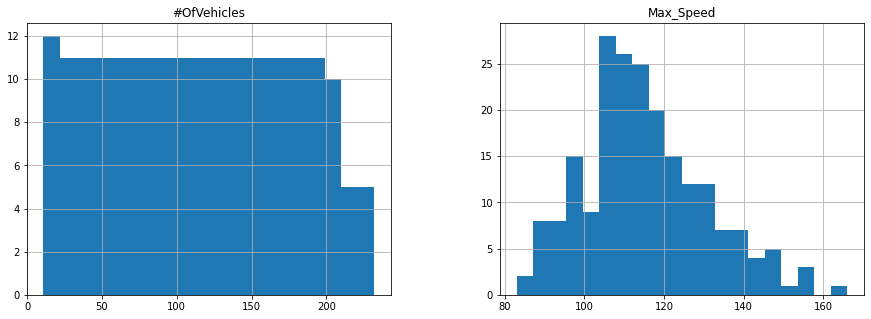

In [8]:
#First shows how #Of Vehicles distributed
#Second shows how Max_Speed distributed 

data.hist(figsize=(15,5), bins=20)

In [9]:
#Correlation of data
data.corr()

,#OfVehicles,Max_Speed
#OfVehicles,1.000000,-0.821565
Max_Speed,-0.821565,1.000000


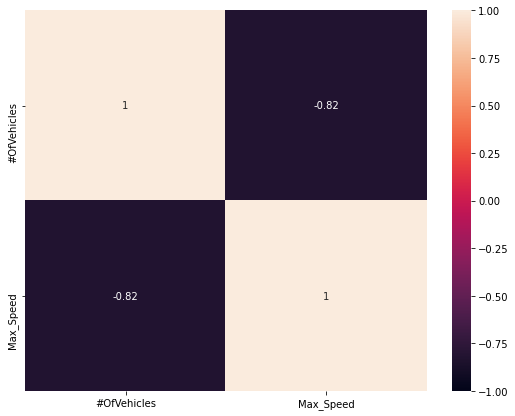

In [10]:
#HeatMap of correlation

plt.subplots(figsize=(9, 7))
sn.heatmap(
    data.corr(),
    annot=True,
    vmin=-1,
    vmax=1
)
plt.show()

In [11]:
data.cov()

,#OfVehicles,Max_Speed
#OfVehicles,3707.517280,-775.736808
Max_Speed,-775.736808,240.470434


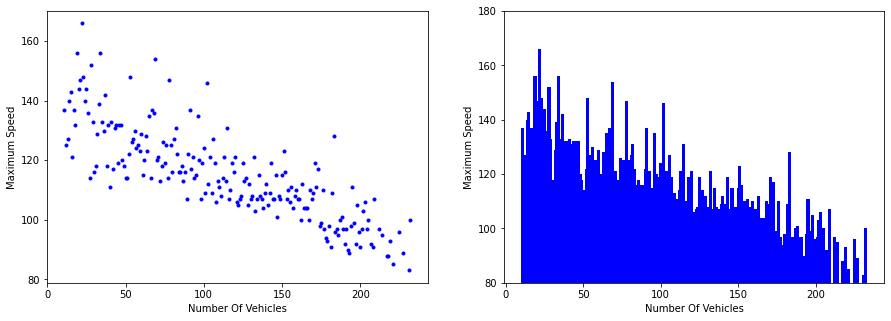

In [12]:
#Figure out the data

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(data['#OfVehicles'],data['Max_Speed'], "b.")
plt.xlabel('Number Of Vehicles')
plt.ylabel('Maximum Speed')

plt.subplot(1,2,2)
plt.bar(data['#OfVehicles'],data['Max_Speed'], width=2 ,color='b')
plt.xlabel('Number Of Vehicles')
plt.ylabel('Maximum Speed')
plt.ylim([80,180])
plt.show()


When we look at he graphs, we can easly say when the number of vehicles increasing, maximum speed is decreasing.

## - How the seasons affects the traffic density?

In [13]:
data2 = pd.DataFrame(traffic_density['DATE_TIME'])
data2['#OF_VEHICLES'] = traffic_density['NUMBER_OF_VEHICLES']

#convert date time to DateTime64 data type and group by date_time
data2['DATE_TIME'] = pd.to_datetime(data2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
data2 = data2.set_index('DATE_TIME')
data4_2 = data2 #for later usage
data2 = data2.groupby(data2.index.month).mean()

#extra columns for seasons
season = []
season_name = []

for i,j in zip([1,2,3,0],['Spring', 'Summer', 'Autumn', 'Winter']):
    for k in range(3):
        season.append(i)
        season_name.append(j)
        
[season.insert(0, season.pop()) for i in range(2)]
[season_name.insert(0, season_name.pop()) for i in range(2)]


data2['Season'] = season
data2['Season_Name'] = season_name
data2

,#OF_VEHICLES,Season,Season_Name
DATE_TIME,,,
1,91.952711,0,Winter
2,92.578047,0,Winter
3,89.369025,1,Spring
4,71.915628,1,Spring
5,73.345259,1,Spring
6,91.512116,2,Summer
7,91.933475,2,Summer
8,89.621144,2,Summer
9,96.177418,3,Autumn


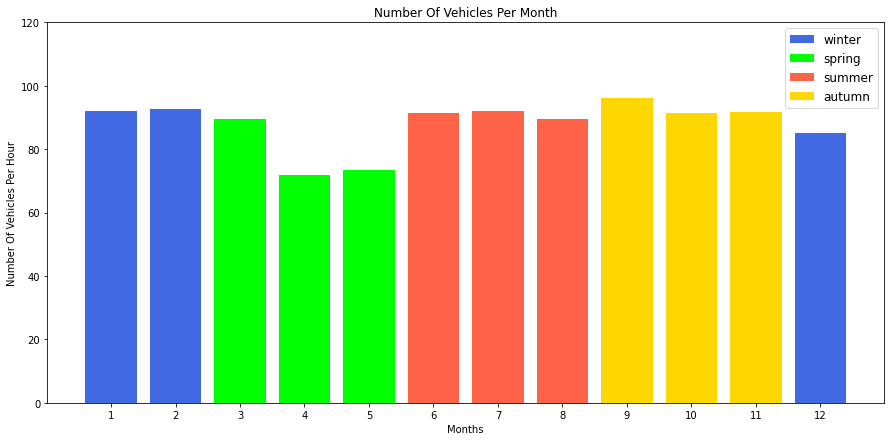

In [14]:
plt.figure(figsize=(15, 7))

#seperation of data between seasons
winter = data2[data2['Season'] == 0]
spring = data2[data2['Season'] == 1]
summer = data2[data2['Season'] == 2]
autumn = data2[data2['Season'] == 3]

#Bar graphs for all seasons
plt.bar(winter.index, winter['#OF_VEHICLES'], color='royalblue')
plt.bar(spring.index, spring['#OF_VEHICLES'], color='lime')
plt.bar(summer.index, summer['#OF_VEHICLES'], color='tomato')
plt.bar(autumn.index, autumn['#OF_VEHICLES'], color='gold')

#plot attributes
plt.ylabel('Number Of Vehicles Per Hour')
plt.xlabel('Months')
plt.xticks(data2.index)
plt.legend(['winter', 'spring', 'summer', 'autumn'], fontsize=12)
plt.ylim((0,120))
plt.title('Number Of Vehicles Per Month')
plt.show()


The graph above shows there is no sharp differences between season ,and also correlation below supports that we cannot say seasons affects the traffic density in whole Istanbul.

In [15]:
#Correlation between number of vehicles and seasons
data2.corr()

,#OF_VEHICLES,Season
#OF_VEHICLES,1.00000,0.34281
Season,0.34281,1.00000


In [16]:
#Season average

data2 = data2.groupby('Season').mean()
data2['Season_Name'] = ['winter', 'spring', 'summer', 'autumn']
data2

,#OF_VEHICLES,Season_Name
Season,,
0,89.896395,winter
1,78.209970,spring
2,91.022245,summer
3,93.105990,autumn


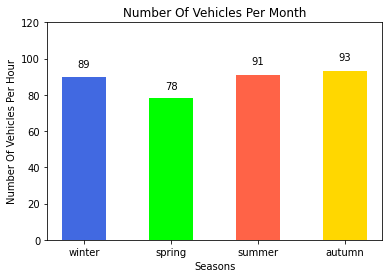

In [17]:
fig, ax = plt.subplots()

plt1 = ax.bar(data2.index, data2['#OF_VEHICLES'], width=0.5, color=['royalblue', 'lime', 'tomato', 'gold'])

for i in plt1:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 1.05*height, '%d' % int(height),
                ha='center', va='bottom')
    
plt.xticks(np.arange(4), ['winter', 'spring', 'summer', 'autumn'])
plt.ylim((0,120))
plt.title('Number Of Vehicles Per Month')
plt.ylabel('Number Of Vehicles Per Hour')
plt.xlabel('Seasons')
plt.show()

when we look at the mean of number of vehicles average per seasons, again althoug spring has lower average, the rest have similar averages.



## - How the season affects traffic announcements?

In [18]:
#Traffic Announcements Dataset
traffic_announcement

,ANNOUNCEMENT_STARTING_DATETIME,ANNOUNCEMENT_ENDING_DATETIME,ANNOUNCEMENT_TITLE,ANNOUNCEMENT_TEXT,ANNOUNCEMENT_TYPE,ANNOUNCEMENT_TYPE_DESC,INTERVENTION_DATETIME,ACCIDENT_STATUS,ACCIDENT_DESCRIPTION,CLOSED_LANE,LONGITUDE,LATITUDE
0,2020-01-01 00:37:32.86 +0300 +03,2020-01-01 01:07:32.86 +0300 +03,trafik kazasi,trafik kazasi (Kaza Bildirimi - Mobil Kullanıc...,16,Kaza Bildirimi,1900-01-01 00:00:00 +0300 +0300,-1,Bilinmiyor,0,29.020774,41.016589
1,2020-01-01 01:40:15.68 +0300 +03,2020-01-01 02:09:00 +0300 +03,D100 15 Temmuz Şehitler Köprüsü Avrupa-Anadolu...,D100 15 Temmuz Şehitler Köprüsü Avrupa-Anadolu...,16,Kaza Bildirimi,2020-01-01 02:39:00 +0300 +03,2,Ekip sevk edildi.,1,41.049952,29.029686
2,2020-01-01 15:03:53.37 +0300 +03,2020-01-01 15:33:00 +0300 +03,"D100 Şükrübey - K.çekmece Yönü, sağ şerit araç...","D100 Şükrübey - K.çekmece Yönü, sağ şerit araç...",32,Araç Arızası,2020-01-01 16:03:00 +0300 +03,-1,Bilinmiyor,-1,40.980171,28.731141
3,2020-01-01 15:19:43.503 +0300 +03,2020-01-01 15:49:00 +0300 +03,"D100 Küçükçekmece-Hacışerif Yönü, sol şerit tr...","D100 Küçükçekmece-Hacışerif Yönü, sol şerit tr...",16,Kaza Bildirimi,2020-01-01 16:19:00 +0300 +03,2,Ekip sevk edildi.,1,40.986579,28.771548
4,2020-01-01 16:46:40.827 +0300 +03,2020-01-01 18:15:00 +0300 +03,"10.Yıl Caddesi-Topkapı Yönü, sağ şerit trafik ...","10.Yıl Caddesi-Topkapı Yönü, sağ şerit trafik ...",16,Kaza Bildirimi,2020-01-01 18:45:00 +0300 +03,1,Kazaya müdahale ediliyor.,1,41.005165,28.921090
...,...,...,...,...,...,...,...,...,...,...,...,...
130628,2021-03-27 19:36:13.787 +0300 +03,2021-03-27 20:06:13.787 +0300 +03,Yoğun Trafik - Sol şerit - Orta şerit - Sağ şerit,Sol şerit - Orta şerit - Sağ şerit (Yoğun Traf...,23,Yoğun Trafik,1900-01-01 00:00:00 +0300 +0300,-1,Bilinmiyor,0,41.093583,29.032096
130629,2021-03-28 05:31:39.343 +0300 +03,2021-03-28 05:45:00 +0300 +03,D100 Zincirlikuyu-15 Temmuz Şehitler Köprüsü Y...,D100 Zincirlikuyu-15 Temmuz Şehitler Köprüsü Y...,16,Kaza Bildirimi,2021-03-28 06:15:00 +0300 +03,1,Kazaya müdahale ediliyor.,1,41.066810,29.008981
130630,2021-03-28 10:22:59.51 +0300 +03,2021-03-28 10:52:59.51 +0300 +03,Kaza Bildirimi - Sağ şerit,Sağ şerit (Kaza Bildirimi - Mobil Kullanıcı Bi...,16,Kaza Bildirimi,1900-01-01 00:00:00 +0300 +0300,-1,Bilinmiyor,0,40.894501,29.262966
130631,2021-03-28 19:12:01.723 +0300 +03,2021-03-28 19:40:00 +0300 +03,"Basın Ekspres İkitelli- Tem Yönü, sol şerit tr...","Basın Ekspres İkitelli- Tem Yönü, sol şerit tr...",16,Kaza Bildirimi,2021-03-28 20:10:00 +0300 +03,2,Ekip sevk edildi.,1,41.060425,28.813421


In [19]:
# In which part of the year traffic announcements are the most?

#data3 is traffic announcement dataset with DateTime64 index
data3 = traffic_announcement
data3['ANNOUNCEMENT_STARTING_DATETIME'] = pd.to_datetime(data3['ANNOUNCEMENT_STARTING_DATETIME'], 
                                                         format='%Y-%m-%d %H:%M:%S.%f +0300 +03', errors='coerce') 
data3 = data3.set_index('ANNOUNCEMENT_STARTING_DATETIME')
data3_2 = data3 #For later usage

#Group by Year,Month
data3 = data3['ANNOUNCEMENT_ENDING_DATETIME'].groupby([data3.index.year, data3.index.month]).count()
data3 = data3.unstack(level=0)

#Get 2019 and 2020 columns and their averages
data3 = data3[data3.columns[2:4]]
data3 = data3.mean(axis=1)

data3.index.name = 'Months'
data3.name = 'Announcements'
data3 = pd.DataFrame(data3)
data3


,Announcements
Months,
1.0,2933.0
2.0,2952.0
3.0,2541.0
4.0,1665.5
5.0,1755.0
6.0,2555.5
7.0,2485.5
8.0,2143.5
9.0,2397.5


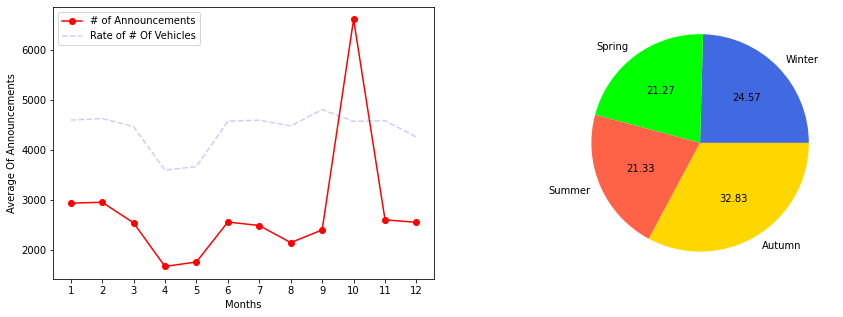

In [20]:
#For traffic density per months (Blue dashed line)
data4_22 = data4_2.groupby(data4_2.index.month).mean()*50

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(data3.index, data3['Announcements'], 'ro-')
plt.plot(data4_22.index, data4_22['#OF_VEHICLES'], 'b--', alpha=0.2)
plt.xticks(np.arange(12)+1)
plt.xlabel('Months')
plt.ylabel('Average Of Announcements')
plt.legend(['# of Announcements', 'Rate of # Of Vehicles'])


#Bar plot
plt.subplot(1,2,2)
plt.pie([
         data3['Announcements'][11:14].mean(),
         data3['Announcements'][2:5].mean(), 
         data3['Announcements'][5:8].mean(), 
         data3['Announcements'][8:11].mean() ], 
         labels=['Winter','Spring','Summer','Autumn'], 
         autopct='%.2f',
         colors=['royalblue', 'lime', 'tomato', 'gold'])
plt.show()

In [21]:
data3_22 = data3_2['ANNOUNCEMENT_TITLE'].groupby([data3_2.index.year, data3_2.index.month]).count().unstack(level=0)
data3_22[data3_22.columns[1:4]]

ANNOUNCEMENT_STARTING_DATETIME,2018.0,2019.0,2020.0
ANNOUNCEMENT_STARTING_DATETIME,,,
1.0,7038.0,1972.0,3894.0
2.0,5177.0,1975.0,3929.0
3.0,5999.0,2275.0,2807.0
4.0,6578.0,1829.0,1502.0
5.0,2741.0,1935.0,1575.0
6.0,2455.0,2202.0,2909.0
7.0,5655.0,2004.0,2967.0
8.0,5914.0,1905.0,2382.0
9.0,5772.0,1984.0,2811.0


Because data is not reliable for October(10), for the rest we can say winter has highest traffic announcement. This is probably a result of weather condtions in winter.


## - How coronavirus affected the traffic in Istanbul?

In [22]:
# How coronavirus affect the traffic of city of Istanbul?

data4 = traffic_index

#index as DateType64 traffic_index_date
data4['TRAFFIC_INDEX_DATE'] = pd.to_datetime(data4['TRAFFIC_INDEX_DATE'],
                                                     format='%Y-%m-%d %H:%M:%S +0000 UTC', errors='ignore')
data4 = data4.set_index('TRAFFIC_INDEX_DATE')
data4_1 = data4 #for later usage

#group the data by year and month
data4 = data4.groupby([data4.index.year, data4.index.month]).mean()
data4

MINIMUM_TRAFFIC_INDEX  \
TRAFFIC_INDEX_DATE TRAFFIC_INDEX_DATE                          
2019               1                                2.806452   
                   2                                3.535714   
                   3                                1.259259   
                   4                                1.966667   
                   5                                1.066667   
                   6                                1.100000   
                   7                                1.064516   
                   8                                1.000000   
                   9                                1.033333   
                   10                               1.580645   
                   11                               3.566667   
                   12                               4.709677   
2020               1                                6.774194   
                   2                                5.793103   
                   3                                3.419355   
                   4                                2.000000   
                   5                                1.516129   
                   6                                2.633333   
                   7                                3.290323   
                   8                                2.129032   
                   9                                2.466667   
                   10                               2.451613   
                   11                               3.000000   
                   12                               4.032258   
2021               1                                4.129032   
                   2                                4.928571   
                   3                                3.677419   
                   4                                2.125000   

                                       MAXIMUM_TRAFFIC_INDEX  \
TRAFFIC_INDEX_DATE TRAFFIC_INDEX_DATE                          
2019               1                              144.645161   
                   2                              136.357143   
                   3                              158.222222   
                   4                              201.566667   
                   5                              208.733333   
                   6                              169.366667   
                   7                              114.709677   
                   8                               43.806452   
                   9                               77.666667   
                   10                              62.225806   
                   11                             129.400000   
                   12                             121.258065   
2020               1                              122.387097   
                   2                              135.586207   
                   3                              115.677419   
                   4                              191.533333   
                   5                              231.612903   
                   6                              239.833333   
                   7                              108.419355   
                   8                              110.258065   
                   9                               92.033333   
                   10                             130.354839   
                   11                              76.866667   
                   12                              85.967742   
2021               1                               70.935484   
                   2                              152.000000   
                   3                              136.064516   
                   4                              186.000000   

                                       AVERAGE_TRAFFIC_INDEX  
TRAFFIC_INDEX_DATE TRAFFIC_INDEX_DATE                         
2019               1                               25.645161  
        

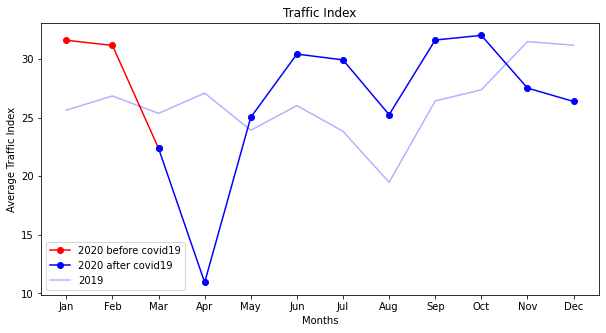

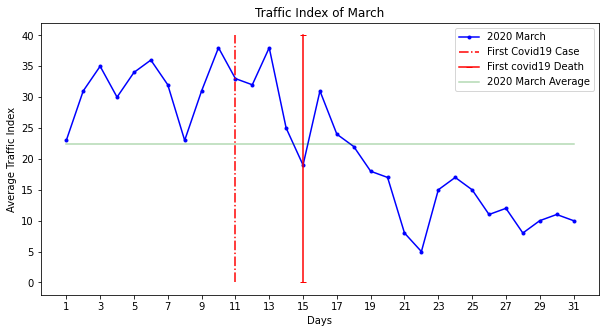

In [23]:
corona_year = data4['AVERAGE_TRAFFIC_INDEX'].unstack(level=0)[2020]
year_2019 = data4['AVERAGE_TRAFFIC_INDEX'].unstack(level=0)[2019]

#first 3 month of 2020 is before_corona
before_corona = corona_year[:3]

#plot graph
plt.figure(figsize=(10,5))
plt.plot(before_corona, 'ro-')
plt.plot(corona_year[2:], 'bo-')
plt.plot(year_2019, 'b-', alpha=0.3)

#plot attributes
plt.xlabel('Months')
plt.ylabel('Average Traffic Index')
plt.title('Traffic Index')
plt.legend(['2020 before covid19', '2020 after covid19', '2019'])
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

#for march
data4_12 = data4_1['AVERAGE_TRAFFIC_INDEX']
data4_12 = data4_12.groupby([data4_12.index.year, data4_12.index.month, data4_12.index.day]).mean()
data4_12 = data4_12.unstack(level=0)[2020].unstack(level=0)[3]

plt.figure(figsize=(10,5))
plt.plot(data4_12, 'b.-')
plt.plot([11, 11], [0, 40], "r-.")
plt.plot([15, 15], [0, 40], "r-_")
plt.plot([ 1, 31], [np.mean(data4_12), np.mean(data4_12)],  "g-", alpha=0.3)
plt.xlabel('Days')
plt.ylabel('Average Traffic Index')
plt.title('Traffic Index of March')
plt.legend(['2020 March', 'First Covid19 Case', 'First covid19 Death', '2020 March Average'])
plt.xticks(np.arange(1,32,2))
plt.show()

As we see from the graph above, Although average of 2020's firs two month is %15 higher that 2019's, traffic index is starting to drop with March when the first covid19 case appeared in Turkey. But also after May, traffic again remains above the 2019 average until November.

Also second graph shows that before 11 March when the first covid19 case appeared, all the data above the monthly average but especially after 15 March when the first covid19 death, daily traffic index decreased below March average.


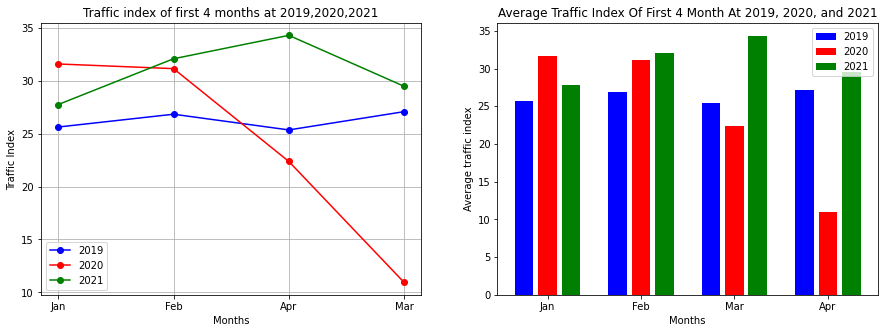

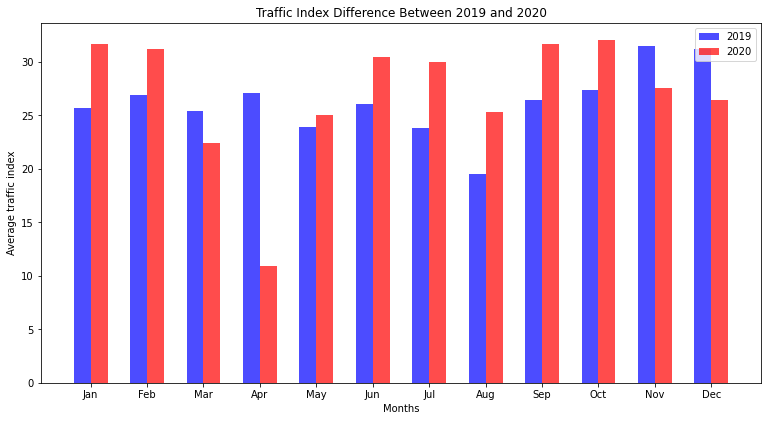

In [24]:
first_4_months = data4['AVERAGE_TRAFFIC_INDEX'].unstack(level=0)[:4]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(first_4_months[2019], 'bo-')
plt.plot(first_4_months[2020], 'ro-')
plt.plot(first_4_months[2021], 'go-')
plt.legend(['2019', '2020', '2021'])
plt.xticks(np.arange(1,5), ['Jan', 'Feb', 'Apr', 'Mar'])
plt.title('Traffic index of first 4 months at 2019,2020,2021')
plt.xlabel('Months')
plt.ylabel('Traffic Index')
plt.grid()

plt.subplot(1,2,2)
plt.bar(np.arange(4)-0.25,first_4_months[2019], width=0.20, color='b')
plt.bar(np.arange(4),first_4_months[2020], width=0.20, color='r')
plt.bar(np.arange(4)+0.25,first_4_months[2021], width=0.20, color='g')

plt.xticks(np.arange(4), ['Jan', 'Feb', 'Mar', 'Apr'])
plt.xlabel('Months')
plt.ylabel('Average traffic index')
plt.legend(['2019', '2020', '2021'])
plt.title('Average Traffic Index Of First 4 Month At 2019, 2020, and 2021')

data4_22 = data4.unstack(level=0)['AVERAGE_TRAFFIC_INDEX']

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

ax.bar(np.arange(12)-0.15,data4_22[2019], width=0.3, color='b', alpha=0.7)
ax.bar(np.arange(12)+0.15,data4_22[2020], width=0.3, color='r', alpha=0.7)

plt.xticks(np.arange(12), Months)
plt.xlabel('Months')
plt.ylabel('Average traffic index')
plt.legend(['2019', '2020'])
plt.title('Traffic Index Difference Between 2019 and 2020')
plt.show()


Figures above, shows us althoug covid19 has an affect on traffic index in short term especially in terms of first 4 months, but the rest of 2020 and 2021 traffic index looks like did not effected by covid19 even there was curfew restictions.   


## - Daily, Monthly and Hourly traffic

Bosphorus bridges are two of most important figures of Istanbul. They connects two continent and also both Europe and Anatolia side of Istanbul. Because of their this features, they are usually more crowded locations. In this project, we will analyze FSM bridge monthly, daily and hourly in term of traffic density.

In [25]:
#Get traffic density of FSM Bridge
data5 = traffic_density
data5.index = data4_2.index
data5 = data5[data5['GEOHASH'] == 'sxk9v2']['NUMBER_OF_VEHICLES']
data5_2 = data5

#Group by Year, Month and Day
data5 = data5.groupby([(data5.index.year),(data5.index.month),(data5.index.day), data5.index.hour]).mean()
data5.index.name = 'Year'
data5 = pd.DataFrame(data5)
data5

NUMBER_OF_VEHICLES
DATE_TIME DATE_TIME DATE_TIME DATE_TIME                    
2020      1         1         0                         126
                              1                         113
                              2                         113
                              3                          68
                              4                          60
...                                                     ...
2021      3         28        19                        104
                              20                        124
                              21                        118
                              22                         87
                              23                         74

[10605 rows x 1 columns]

In [26]:
#Group by Moths 
data5_22 = pd.DataFrame(data5['NUMBER_OF_VEHICLES'].unstack(level=0)[2020].unstack(level=0).mean(), columns=['2020'])

#Group by Days
data5_23 = pd.DataFrame(data5['NUMBER_OF_VEHICLES'].unstack(level=0)[2020].unstack(level=1).mean(), columns=['2020'])

#Group by Hours
data5_24 = pd.DataFrame(data5['NUMBER_OF_VEHICLES'].unstack(level=0)[2020].unstack(level=2).mean(), columns=['2020'])

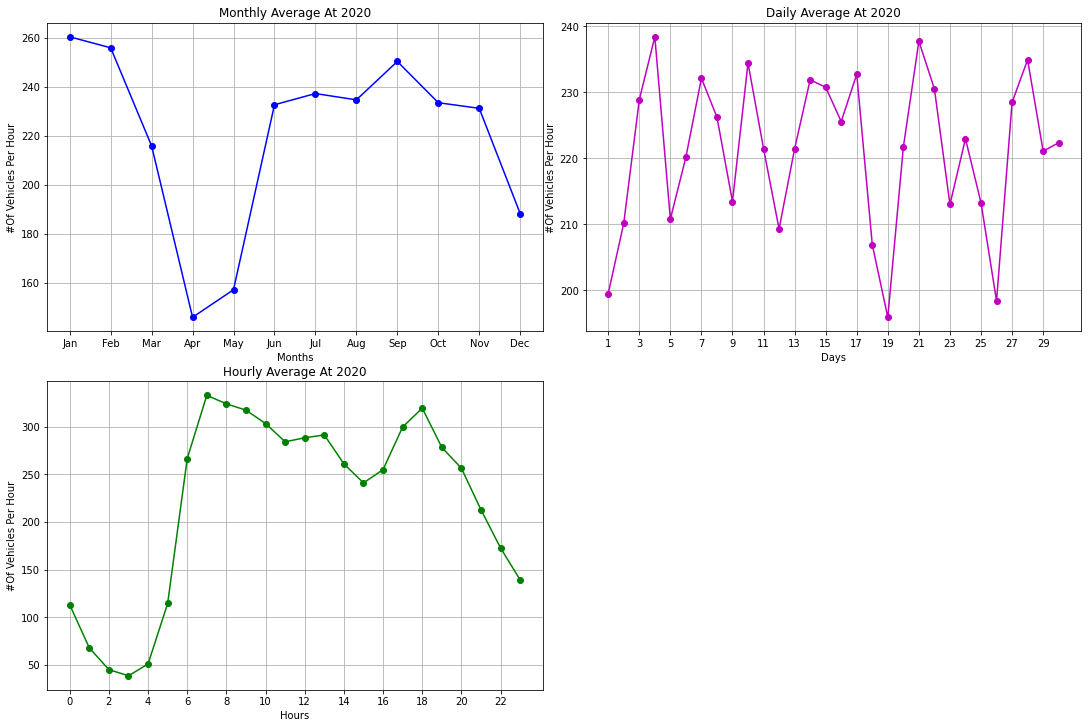

In [27]:
plt.figure(figsize=(15,10))

# Plot Monthly Average
plt.subplot(2,2,1)
plt.plot(data5_22, 'bo-')
plt.xticks(np.arange(1,13), Months)
plt.xlabel('Months')
plt.ylabel('#Of Vehicles Per Hour')
plt.title("Monthly Average At 2020")
plt.grid()

# Plot Average Average
plt.subplot(2,2,2)
plt.plot(data5_23[:-1], 'mo-')
plt.xticks(np.arange(1,31,2))
plt.xlabel('Days')
plt.ylabel('#Of Vehicles Per Hour')
plt.title("Daily Average At 2020")
plt.grid()

# Plot Hourly Average
plt.subplot(2,2,3)
plt.plot(data5_24, 'go-')
plt.xticks(np.arange(0,24,2))
plt.xlabel('Hours')
plt.ylabel('#Of Vehicles Per Hour')
plt.title("Hourly Average At 2020")
plt.grid()

plt.tight_layout(pad=0.3)
plt.show()

Monthly Average At 2020 4


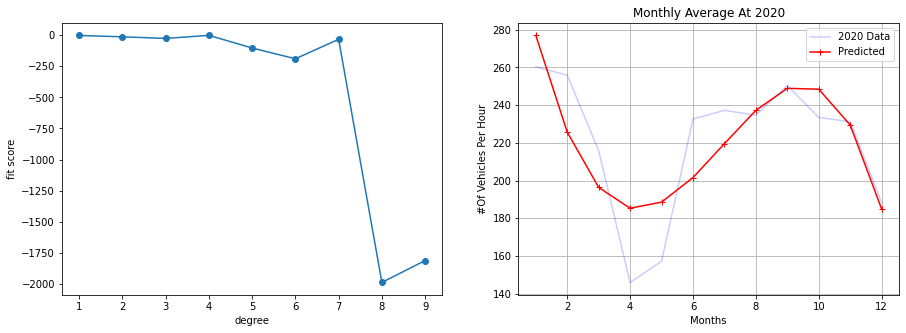

In [28]:
#For Monthly Average Cross Validation Score To Find Best Parameters.
X_month =data5_22.index.values.reshape(-1,1)
Y_month =data5_22['2020']
index_max = -10e5
degree = np.arange(1, 10)
score_list =[]
for i in range(len(degree)):
    poly_model = make_pipeline(PolynomialFeatures(i),LinearRegression())
    scores = cross_val_score(poly_model,X_month,Y_month,cv=5)
    score_list.append(np.nanmedian(scores))
    if np.nanmedian(scores) > index_max:
        index_max = np.nanmedian(scores)
        index = i+1
max_fit_monthly_average_2020 = index
print('Monthly Average At 2020', max_fit_monthly_average_2020)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(degree,score_list ,'-o')
plt.xlabel('degree')
plt.ylabel('fit score')


poly_model_month = make_pipeline(PolynomialFeatures(max_fit_monthly_average_2020),LinearRegression())
poly_model_month.fit(X_month,Y_month)
x_month_test = np.linspace(1,12,12).reshape(-1,1)
y_month_test = poly_model_month.predict(x_month_test)

plt.subplot(1,2,2)
plt.xlabel('Months')
plt.ylabel('#Of Vehicles Per Hour')
plt.title("Monthly Average At 2020")
plt.plot(X_month,Y_month,'b-',alpha = 0.2)
plt.plot(x_month_test,y_month_test,'r-+')
plt.legend(['2020 Data', 'Predicted'])
plt.grid()
plt.show()

Daily Average At 2020 12


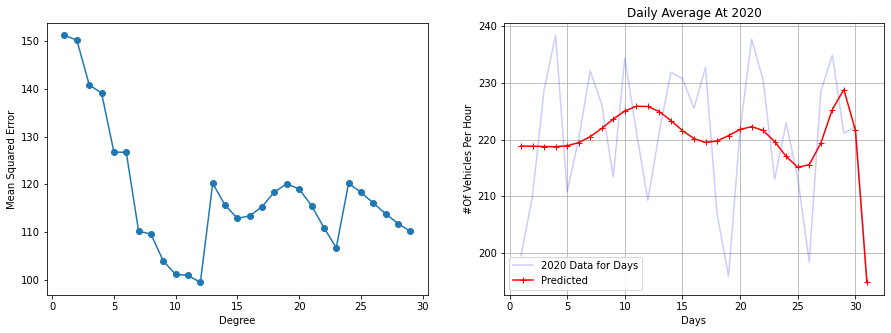

In [29]:
#For Daily Average Mean Squared Error To Find Best Parameters.
from sklearn.metrics import mean_squared_error
degree = np.arange(1,30,1)

X_day =data5_23.index.values.reshape(-1,1)  #index
Y_day =data5_23        #values
min_error = 999999999
score_list =[]
index_z = -1
for i in range(len(degree)):
    poly_model_day = make_pipeline(PolynomialFeatures(i),LinearRegression())
    scores = cross_val_score(poly_model_day,X_day,Y_day)
    poly_model_day.fit(X_day,Y_day)
    y_day_test = poly_model_day.predict(X_day)
    rms = mean_squared_error(Y_day, y_day_test, squared=True)
    score_list.append(rms)
    if rms < min_error :
        min_error  = rms
        index_z = i+1
max_fit_daily_average_2020 = index_z
print('Daily Average At 2020', max_fit_daily_average_2020)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(degree,score_list ,'-o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')

#DAILY PREDİCT GRAPH
poly_model_day = make_pipeline(PolynomialFeatures(max_fit_daily_average_2020),LinearRegression())
poly_model_day.fit(X_day,Y_day)
x_day_test = np.arange(1,32,1).reshape(-1,1)
y_day_test = poly_model_day.predict(X_day)

plt.subplot(1,2,2)
plt.xlabel('Days')
plt.ylabel('#Of Vehicles Per Hour')
plt.title("Daily Average At 2020")
plt.plot(X_day,Y_day,'b-',alpha = 0.2)
plt.plot(X_day,y_day_test,'r-+')
plt.legend(['2020 Data for Days', 'Predicted'])
plt.grid()
plt.show()


Hourly Average At 2020 12


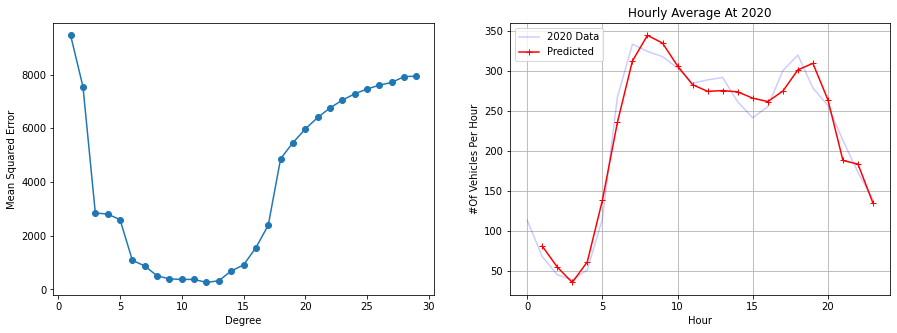

In [30]:
#For Hourly Average with Mean Squared Error To Find Best Parameters
from sklearn.metrics import mean_squared_error
degree = np.arange(1,30,1)

X_hour =data5_24.index.values.reshape(-1,1)  #index
Y_hour =data5_24        #values
min_error = 999999999
score_list =[]
index_z = -1
for i in range(len(degree)):
    poly_model_hour = make_pipeline(PolynomialFeatures(i),LinearRegression())
    scores = cross_val_score(poly_model_hour,X_day,Y_day)
    poly_model_hour.fit(X_hour,Y_hour)
    y_hour_test = poly_model_hour.predict(X_hour)
    rms = mean_squared_error(Y_hour, y_hour_test, squared=True)
    score_list.append(rms)
    if rms < min_error :
        min_error  = rms
        index_z = i+1
max_fit_hourly_average_2020 = index_z
print('Hourly Average At 2020', max_fit_hourly_average_2020)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(degree,score_list ,'-o')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')

#Hourly PREDİCT GRAPH
poly_model_hourly = make_pipeline(PolynomialFeatures(max_fit_hourly_average_2020),LinearRegression())
poly_model_hourly.fit(X_hour,Y_hour)
x_hour_test = np.linspace(1,23,23).reshape(-1,1)
y_hour_test = poly_model_hourly.predict(x_hour_test)

plt.subplot(1,2,2)
plt.xlabel('Hour')
plt.ylabel('#Of Vehicles Per Hour')
plt.title("Hourly Average At 2020")
plt.plot(X_hour,Y_hour,'b-',alpha = 0.2)
plt.plot(x_hour_test,y_hour_test,'r-+')
plt.legend(['2020 Data', 'Predicted'])
plt.grid()
plt.show()

## - Is it more crowded on weekdays or weekends?

In [31]:
#initilaze dataframes for weekdays and weekends
weekdays = pd.DataFrame()
weekends = pd.DataFrame()

#Get data grouped by Year, Month, Day
data5_22 = pd.DataFrame(data5_2)
data5_22 = data5_22.groupby([(data5_2.index.year),(data5_2.index.month),(data5_2.index.day)]).mean()
data5_22 = pd.DataFrame(data5_22)
data5_22.index.names = ['Year', 'Month', 'Day']

for i in range(0,data5_22.index.size,7):
    
    #Because data is not include December 28,29,30 so it is not stable
    if i >= 364:
        i += 3
    weekdays = weekdays.append(data5_22[i:i+1])
    for j in range(1,3):
        if i+j < data5_22.index.size:
            weekdays = weekdays.append(data5_22[i+j:i+1+j])
        if i-j > 0:
            weekdays = weekdays.append(data5_22[i-j:i+1-j])
    weekends = weekends.append(data5_22[i+3:i+4])
    weekends = weekends.append(data5_22[i+4:i+5])      
    
#Again because data is instable we add manually Jan 1,2,3
weekdays = weekdays.append(data5_22.loc[(2021,1,1)])
weekends = weekends.append(data5_22.loc[(2021,1,2)])
weekends = weekends.append(data5_22.loc[(2021,1,3)])

print('Weekday instances: ', weekdays.shape)
print('Weekend instances: ', weekends.shape)

Weekday instances:  (319, 1)
Weekend instances:  (130, 1)


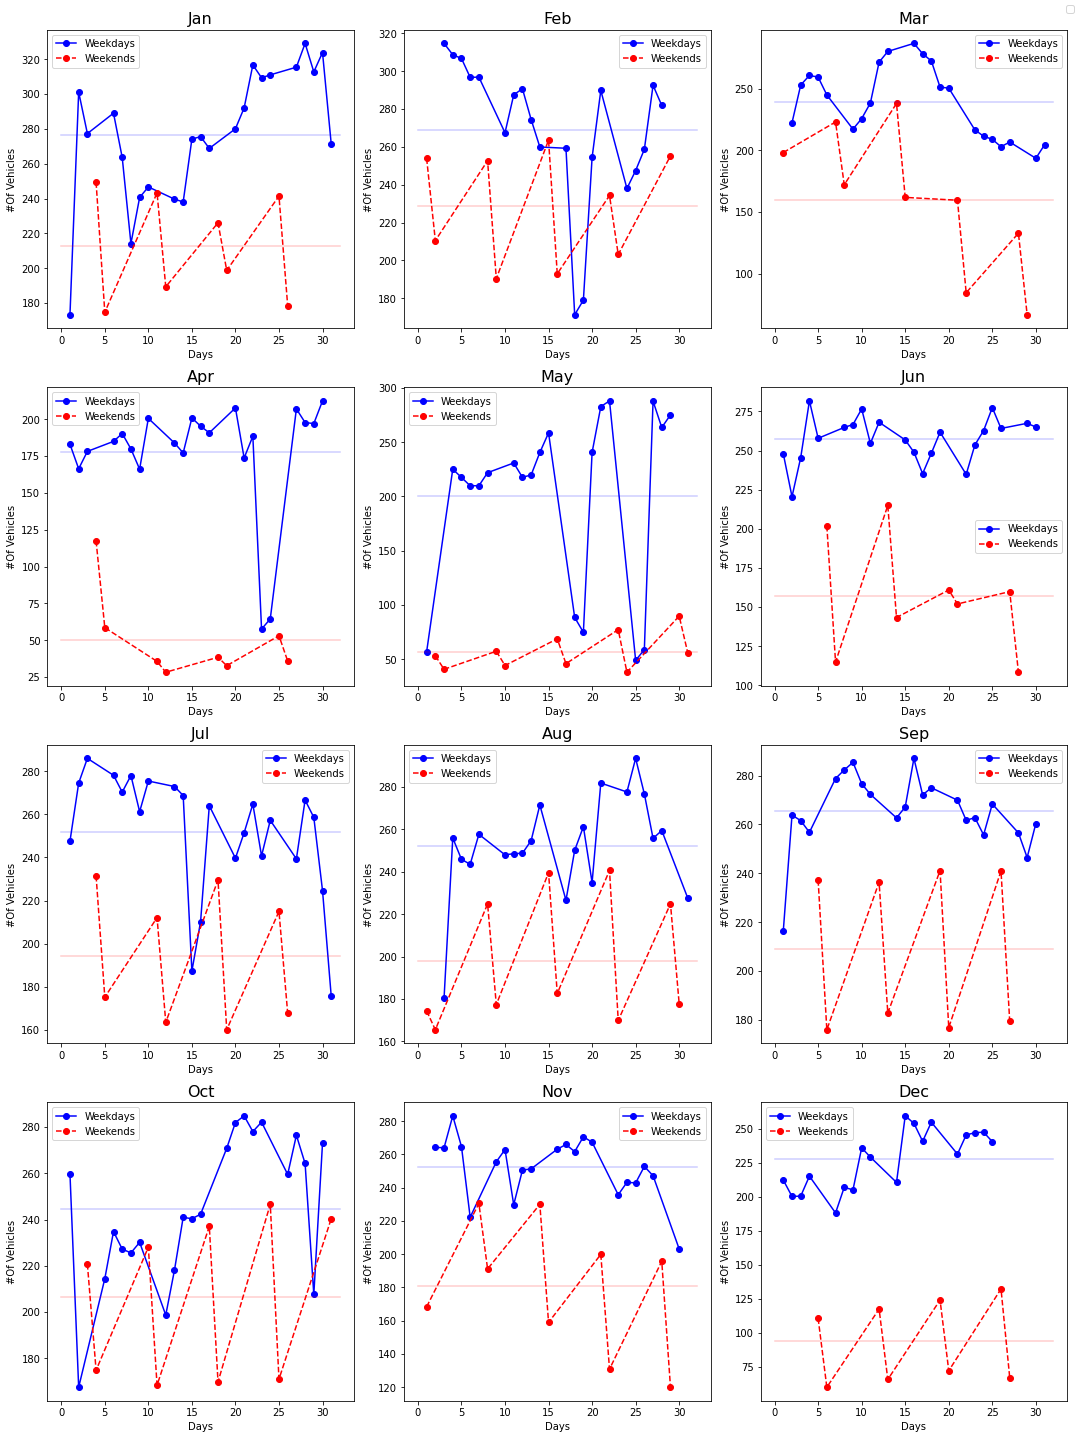

In [32]:
#drop Year from index to column
weekdays_unstack = weekdays.unstack(level=0)['NUMBER_OF_VEHICLES']
weekends_unstack = weekends.unstack(level=0)['NUMBER_OF_VEHICLES']

#drop Month from index to column
xz = pd.DataFrame(weekdays_unstack[2020]).unstack(level=0)
xy = pd.DataFrame(weekends_unstack[2020]).unstack(level=0)

fig = plt.figure(figsize=(15,20))
fig.legend(['Weekdays', 'Weekends', 'Weekdays avg', 'Weekends avg'])
plt.axis('off')

for j in xz.columns:
    splt = fig.add_subplot(4,3,j[1])
    splt.plot(xz[2020][j[1]].dropna(), "bo-")
    splt.plot(xy[2020][j[1]].dropna(), "ro--")
    xz_mean = xz[2020][j[1]].dropna().mean()
    xy_mean = xy[2020][j[1]].dropna().mean()
    splt.plot([0,32], [xz_mean, xz_mean], "b-", alpha=0.2)
    splt.plot([0,32], [xy_mean, xy_mean], "r-", alpha=0.2)
    plt.xlabel('Days')
    plt.ylabel('#Of Vehicles')
    plt.legend(['Weekdays', 'Weekends'])
    plt.title(Months[j[1]-1], fontsize=16)
    plt.tight_layout(pad=1)
plt.show()

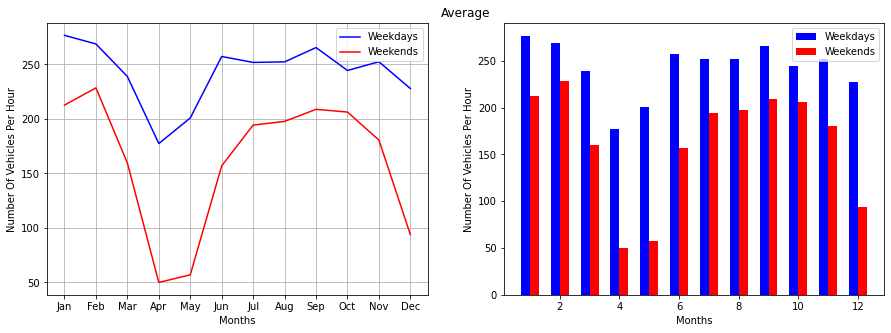

In [33]:
weekdays_means = []
weekends_means = []

fig = plt.figure(figsize=(15,5))
plt.title('Average')
plt.axis('off')

splt = fig.add_subplot(1,2,1)

for i,j in xz.columns:
    mean = xz[2020][j].mean()
    weekdays_means.append(mean)
    
for i,j in xy.columns:
    mean = xy[2020][j].mean()
    weekends_means.append(mean)

splt.plot(weekdays_means, 'b-')
splt.plot(weekends_means, 'r-')
plt.xlabel('Months')
plt.ylabel('Number Of Vehicles Per Hour')
plt.legend(['Weekdays', 'Weekends'])
plt.xticks(np.arange(0,12), Months)
plt.grid()

splt = fig.add_subplot(1,2,2)
splt.bar(np.arange(1,13)-0.15, weekdays_means, width=0.3, color='b')
splt.bar(np.arange(1,13)+0.15, weekends_means, width=0.3, color='r')
plt.xlabel('Months')
plt.ylabel('Number Of Vehicles Per Hour')
plt.legend(['Weekdays', 'Weekends'])
plt.show()

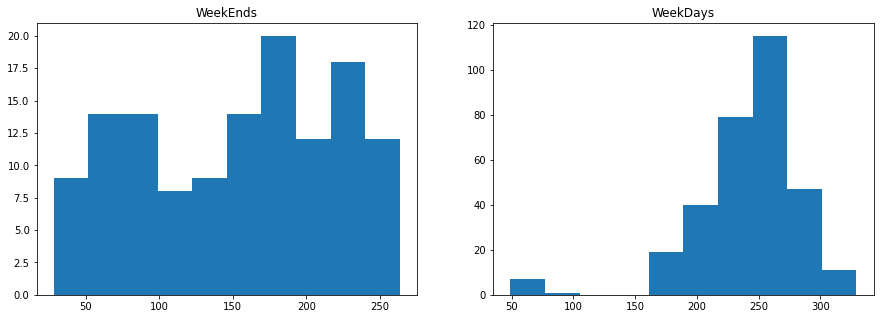

In [34]:
fig = plt.figure(figsize=(15,5))

sub_plot = fig.add_subplot(1,2,1)
plt.title('WeekEnds')
sub_plot.hist(weekends)


sub_plot = fig.add_subplot(1,2,2)
plt.title('WeekDays')
sub_plot.hist(weekdays)
plt.show()

In [35]:
#Mean And Scale of Two Parameters
print('Mean of WeekDays : ', weekdays.mean().values)
scale_weekday = stats.norm.interval(0.95, loc=weekdays.mean(), scale = weekdays.std()/np.sqrt(len(data5)))
print('Scale          : ', scale_weekday[0],scale_weekday[1], '\n')

print('Mean of WeekEnds : ', weekends.mean().values)
scale_weekends = stats.norm.interval(0.95, loc=weekends.mean(), scale = weekends.std()/np.sqrt(len(data5)))
print('Scale          : ', scale_weekends[0],scale_weekends[1])

Mean of WeekDays :  [241.58566945]
Scale          :  [240.77880309] [242.39253581] 

Mean of WeekEnds :  [153.97081344]
Scale          :  [152.70002197] [155.24160491]


In [36]:
#Standart Error Of Mean
print("SEM for WeekDays: ", stats.sem(weekdays)[0])
print("SEM for WeekEnds: ", stats.sem(weekends)[0])

SEM for WeekDays:  2.3736326833828763
SEM for WeekEnds:  5.856118571667994


In [37]:
#Difference Of Means
print("Difference of means WeekDays on WeekEnds           : ", np.mean(weekdays_means) - np.mean(weekends_means))

print("Difference of means WeekDays on WeekEnds Percentage: ", 
      (np.mean(weekdays_means) - np.mean(weekends_means))/np.mean(weekdays_means) * 100)

Difference of means WeekDays on WeekEnds           :  80.66447762465367
Difference of means WeekDays on WeekEnds Percentage:  33.21314878949488


In [38]:
#T-Test
T_test = stats.ttest_ind(weekdays, weekends, equal_var=False)
print('Statistic : ', T_test[0])
print('P-Value   : ', T_test[1])

Statistic :  [13.86556517]
P-Value   :  [7.0343564e-30]


In [39]:
#Shapiro Results
print('P-Value of WeekDays : ', stats.shapiro(weekdays)[1])
print('P-Value of WeekEnds : ', stats.shapiro(weekends)[1])

P-Value of WeekDays :  4.957117916391536e-16
P-Value of WeekEnds :  3.7606303521897644e-05


Conclusion:
Since our weekend and weekday data are not uniformly distributed, we cannot definitively conclude that weekends are more crowded based on these tests.
Despite this, our P values appear to be extremely close to 0. If our data were uniformly distributed, we could say that on weekdays are more crowded than on weekends.

However, our data and the graphs we have drawn show that the 2020 hourly vehicle graph weekday data shows higher data than the 2020 weekend data in any condition. In fact, even we can easily say that Saturdays are more crowded than Sundays.

## - How each day affects the trafic density?

In [40]:
#initialize days
mon = []
tue = []
wed = []
thu = []
fri = []
sat = []
sun = []

data_for_2020_days = pd.DataFrame(weekdays_unstack[2020].dropna().append(weekends_unstack[2020].dropna())).sort_index()

for i in range(0, data_for_2020_days.size, 7):
    try:
        wedx, thux, frix, satx, sunx, monx, tuex = data_for_2020_days[i:i+7].values
        mon.append(monx[0])
        tue.append(tuex[0])
        
    except:
        wedx, thux, frix, satx, sunx = data_for_2020_days[i:i+7].values
    
    wed.append(wedx[0])
    thu.append(thux[0])
    fri.append(frix[0])
    sat.append(satx[0])
    sun.append(sunx[0])
    

In [41]:
df_weeks = pd.DataFrame(mon, columns=['Monday'])
df_weeks['Tuesday'] = tue
df_weeks['Wednesday'] = wed[:-1]
df_weeks['Thursday'] = thu[:-1]
df_weeks['Friday'] = fri[:-1]
df_weeks['Saturday'] = sat[:-1]
df_weeks['Sunday'] = sun[:-1]
print("Shape oF Weeks: ",df_weeks.shape)
print("-------------------------------")
df_weeks.head(10)

Shape oF Weeks:  (51, 7)
-------------------------------


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,289.000000,263.583333,173.291667,301.125000,277.291667,249.291667,174.708333
1,239.666667,238.041667,214.166667,240.625000,246.666667,243.250000,189.333333
2,280.041667,292.041667,274.125000,275.541667,268.791667,226.083333,198.750000
3,315.416667,329.083333,316.708333,309.333333,311.000000,241.416667,178.454545
4,314.666667,308.666667,312.708333,323.833333,271.333333,253.875000,210.458333
5,267.458333,287.458333,306.708333,296.708333,296.833333,252.666667,190.375000
6,259.250000,171.291667,290.708333,274.416667,259.916667,263.541667,192.916667
7,238.000000,247.458333,179.000000,254.368421,289.800000,234.291667,203.125000
8,222.333333,252.916667,258.666667,292.500000,281.875000,255.208333,198.166667
9,217.125000,225.681818,260.708333,259.333333,244.875000,222.958333,172.041667


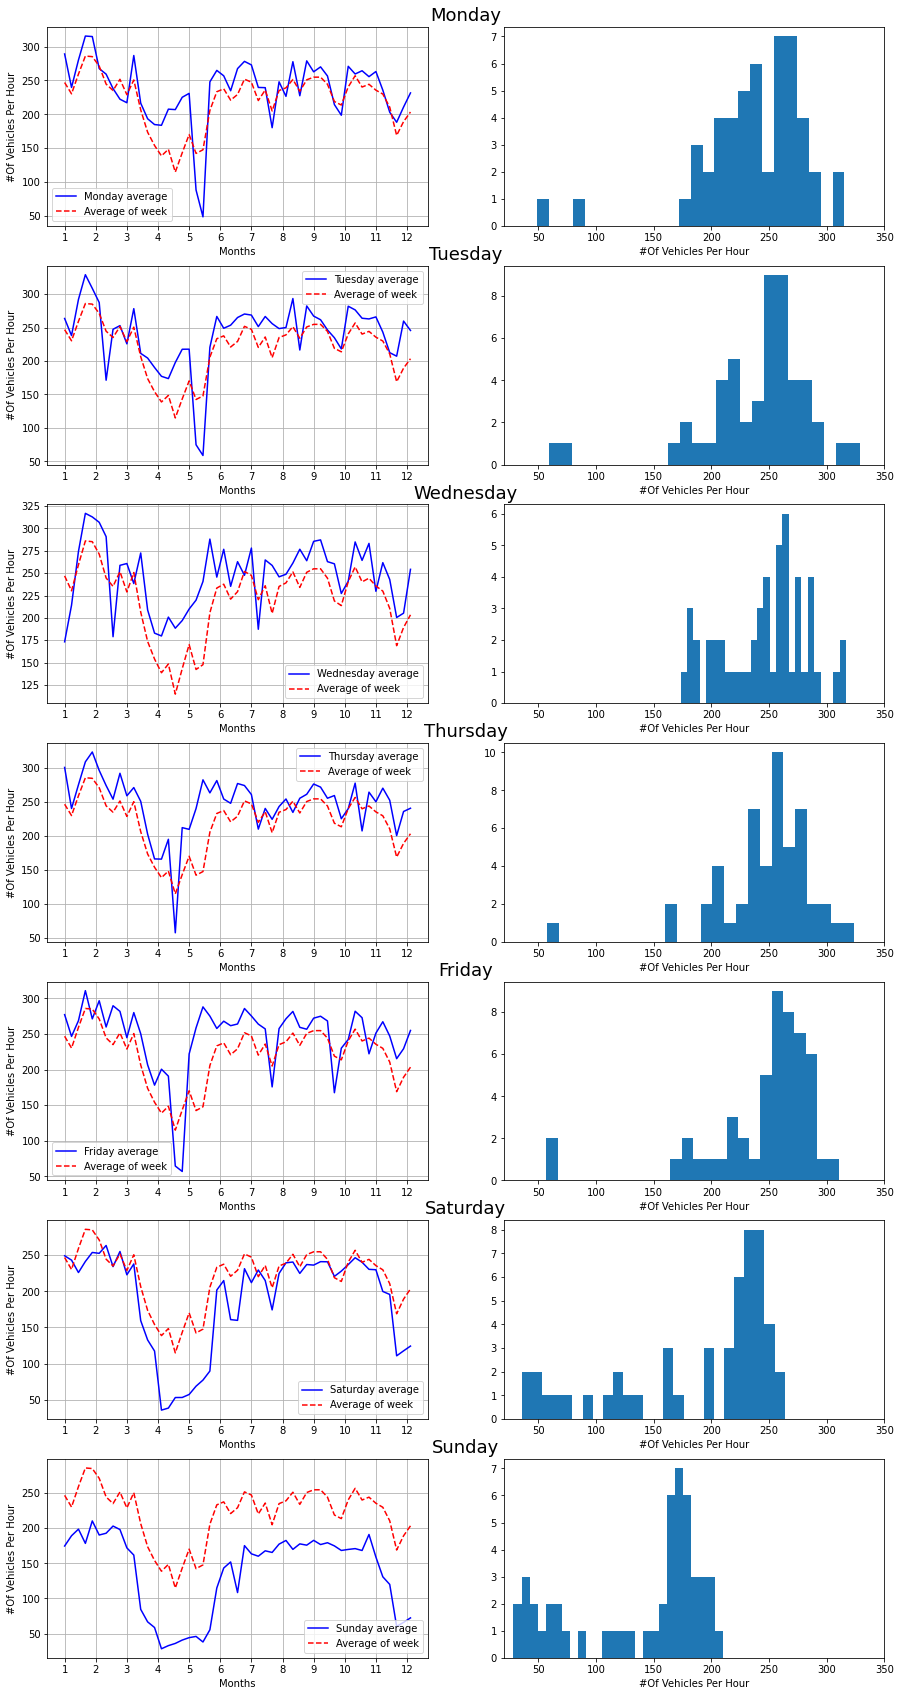

In [42]:
fig, big_axes = plt.subplots(figsize=(15,30), nrows=7, ncols = 1, sharey=True)
Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for big_ax,i in zip(big_axes,Days):
    big_ax.set_title(i, fontsize=18)
    big_ax.set_axis_off()      

for i,j in zip(np.arange(0,14,2), df_weeks.columns):
    splt = fig.add_subplot(7,2,i+1)
    splt.plot(df_weeks[j], 'b-')
    splt.plot(df_weeks.mean(axis=1), 'r--')
    plt.xticks(np.arange(0,52,4.5), np.arange(1,13))
    plt.grid()
    plt.legend(['{} average'.format(j), 'Average of week'])
    plt.xlabel('Months')
    plt.ylabel('#Of Vehicles Per Hour')

    fig.add_subplot(7,2,i+2)
    plt.hist(df_weeks[j], bins=26)
    plt.xlim((20,350))
    plt.xlabel('#Of Vehicles Per Hour')

We again see that weekdays above the average of whole weeks and weekends below the average. But also we see that averages of weeks decrease in the spring.
On the rights side, we can see that number of vehicles per hour of weekdays accumulate in between 150 and 320 where weekendens accumulate lower.

 ## - Most crowded hours of days

In [43]:
#initialize days
mon = []
tue = []
wed = []
thu = []
fri = []
sat = []
sun = []

data_for_2020_days = pd.DataFrame(weekdays_unstack[2020].dropna().append(weekends_unstack[2020].dropna())).sort_index()

for i in range(0, data_for_2020_days.size, 7):
    if i+7 < data_for_2020_days.size:
        wedx, thux, frix, satx, sunx, monx, tuex = np.arange(i, i+7)
        mon.append(monx)
        tue.append(tuex)
        
    else:
        wedx, thux, frix, satx, sunx = np.arange(i, i+5)
    
    wed.append(wedx)
    thu.append(thux)
    fri.append(frix)
    sat.append(satx)
    sun.append(sunx)

In [44]:
data6 = traffic_density['NUMBER_OF_VEHICLES'].groupby([traffic_density.index.year, 
                                                     traffic_density.index.month, 
                                                     traffic_density.index.day, 
                                                     traffic_density.index.hour]).mean()
data6.index.names = ['Year', 'Month', 'Day', 'Hour']
data6 = data6[2020].unstack(level=2)

days_hours = pd.DataFrame(index=np.arange(24))

for i,j in zip([mon, tue, wed, thu, fri, sat, sun], Days):
    df_temp = pd.DataFrame(np.arange(24))
    for k in i:
        df = data6[k:k+1].iloc[0]
        df_temp = df_temp.add(pd.DataFrame(df.values).fillna(90))
        
    days_hours[j] = df_temp/len(i)
    
days_hours['Weekday_avg'] = days_hours[days_hours.columns[0:5]].mean(axis=1)
days_hours['Weekend_avg'] = days_hours[days_hours.columns[5:7]].mean(axis=1)

print("Shape of Hours: ",days_hours.shape)
days_hours.head(10)

Shape of Hours:  (24, 9)


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Weekday_avg,Weekend_avg
0,52.877468,57.288101,58.982683,59.917981,60.834102,63.372644,52.716031,57.980067,58.044337
1,41.898876,43.854873,44.392532,44.558275,45.974885,45.399443,36.759923,44.135888,41.079683
2,35.912831,36.992588,37.882062,37.995879,39.557501,37.090301,28.008716,37.668172,32.549508
3,32.872809,33.965622,35.308971,34.982659,37.041330,33.656200,25.922917,34.834278,29.789559
4,35.393334,36.595479,37.442124,37.519707,39.611087,35.189174,27.541727,37.312346,31.365450
5,59.270540,58.588419,58.813288,60.558115,59.646521,48.171102,39.898495,59.375377,44.034798
6,123.097114,123.527864,119.428038,123.762887,115.241364,79.658724,47.658925,121.011453,63.658824
7,132.241706,135.264754,131.247194,136.922921,129.914397,102.652189,58.511091,133.118195,80.581640
8,109.070098,114.058575,114.571722,118.918968,114.356809,102.999882,53.467821,114.195235,78.233851
9,106.858458,106.630909,111.242907,112.476387,109.041162,97.552604,52.652548,109.249965,75.102576


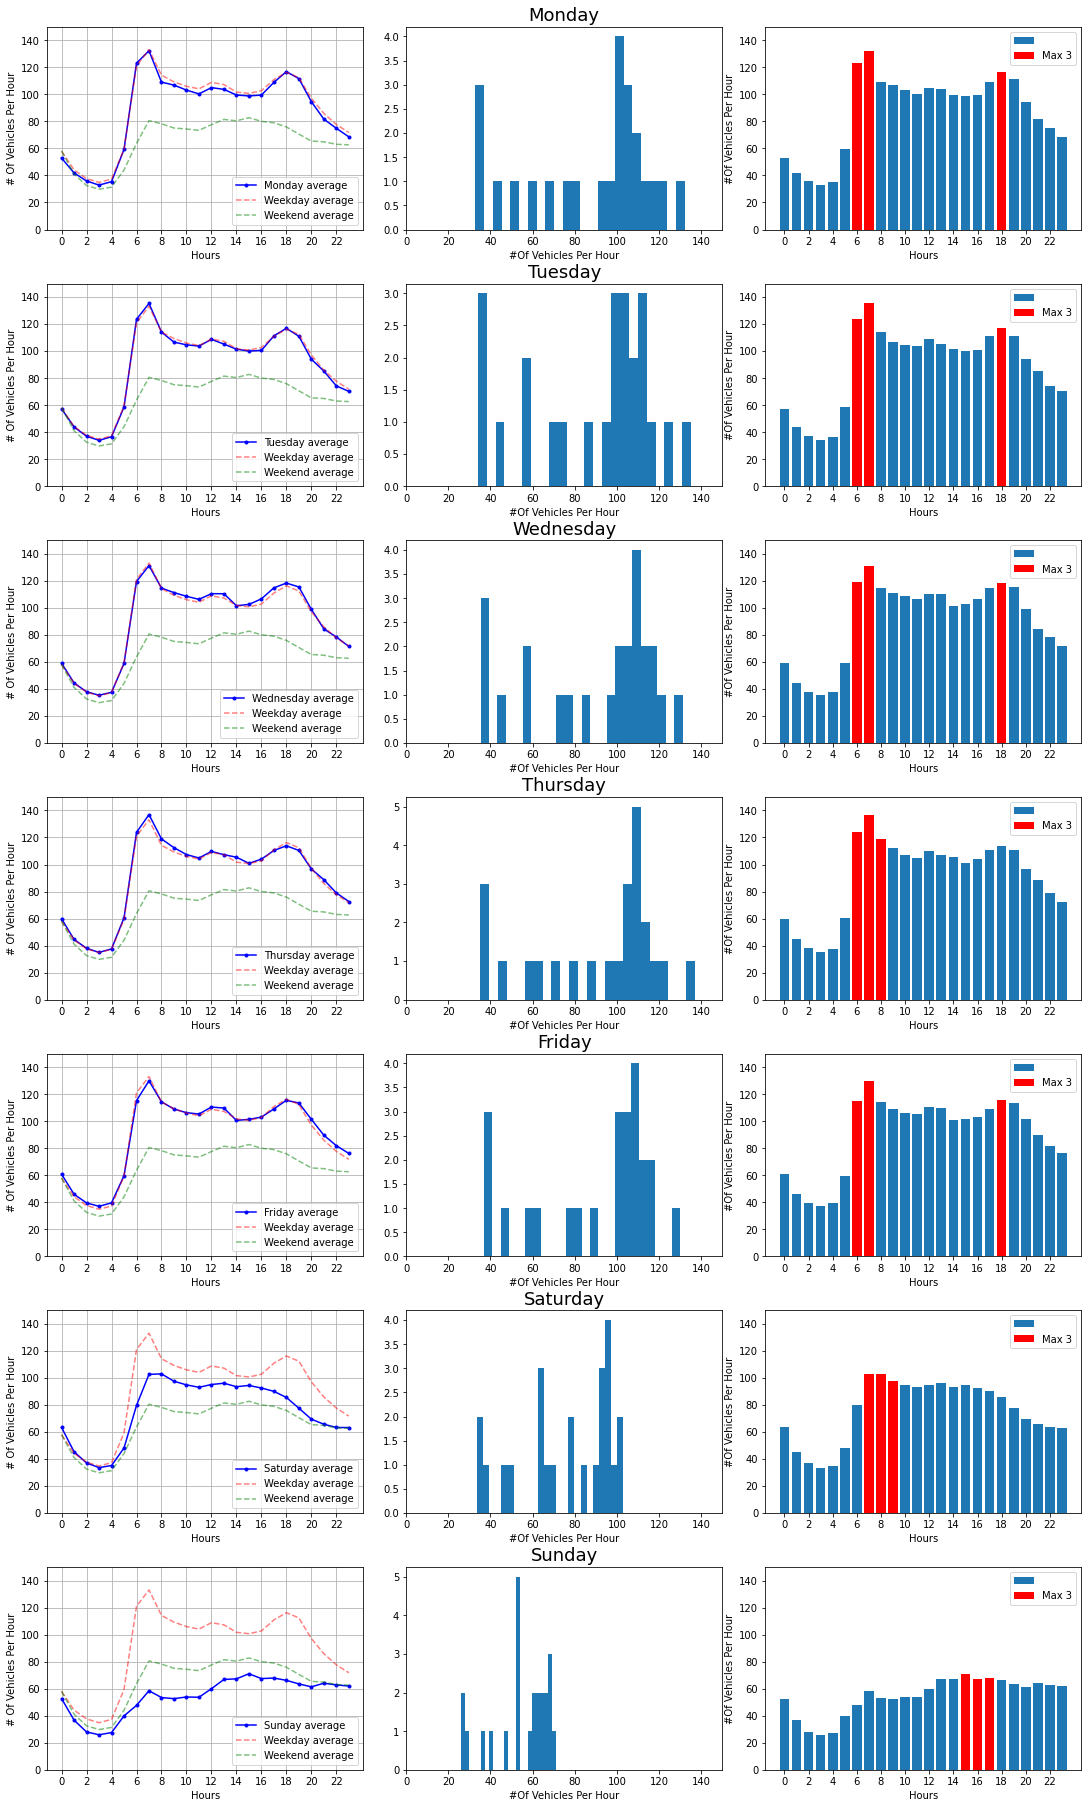

In [45]:
fig, big_axes = plt.subplots(figsize=(15,25), nrows=7, ncols = 1, sharey=True)

for big_ax,i in zip(big_axes,Days):
    big_ax.set_title(i, fontsize=18)
    big_ax.set_axis_off()     
    
for i,j in zip(np.arange(0,21,3), days_hours.columns):
    fig.add_subplot(7,3,i+1)
    plt.plot(days_hours[j], "b.-")

    plt.plot(days_hours['Weekday_avg'], "r--", alpha=0.5)
    plt.plot(days_hours['Weekend_avg'], "g--", alpha=0.5)
        
    plt.ylim(0,150)
    plt.xticks(np.arange(0,24,2))
    plt.grid()
    plt.legend(['{} average'.format(j), 'Weekday average', 'Weekend average'])
    plt.xlabel('Hours')
    plt.ylabel('# Of Vehicles Per Hour')
    
    fig.add_subplot(7,3,i+2)
    plt.hist(days_hours[j], bins=24)
    plt.xlim((0,150))
    plt.xlabel('#Of Vehicles Per Hour')
    
    fig.add_subplot(7,3,i+3)
    plt.ylim(0,150)
    plt.xticks(np.arange(0,24,2))
    plt.bar(np.arange(24),days_hours[j])
    plt.bar(days_hours[j].nlargest(3).index,days_hours[j].nlargest(3), color='r')
    plt.ylabel('#Of Vehicles Per Hour')
    plt.xlabel('Hours')
    plt.legend(['', 'Max 3'])
    
    fig.tight_layout(pad=0.3)

When we look at day by day, work entry(6-8am) and work close(18) which specified with red color are most crowded hours on weekdays. But also on Saturday, we again see that most crowded hours are between 7-9.

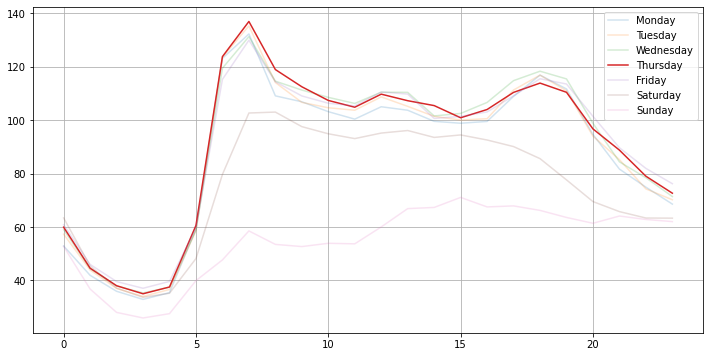

In [46]:
#Mean of the days Plot
plt.figure(figsize = (12,6))
plt.plot(days_hours.index.values,days_hours['Monday'], alpha=0.2)
plt.plot(days_hours.index.values,days_hours['Tuesday'],alpha = 0.2)
plt.plot(days_hours.index.values,days_hours['Wednesday'],alpha = 0.2)
plt.plot(days_hours.index.values,days_hours['Thursday'])
plt.plot(days_hours.index.values,days_hours['Friday'],alpha = 0.2)
plt.plot(days_hours.index.values,days_hours['Saturday'],alpha = 0.2)
plt.plot(days_hours.index.values,days_hours['Sunday'],alpha = 0.2)
plt.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.grid()
plt.show()

In [47]:
days_hours.mean()

Monday         87.360502
Tuesday        88.896125
Wednesday      90.709629
Thursday       90.781301
Friday         90.641109
Saturday       75.857580
Sunday         54.637816
Weekday_avg    89.677733
Weekend_avg    65.247698
dtype: float64